# Testing KERAS on the SVHN dataset

- model architecture from https://nbviewer.jupyter.org/github/dyckia/SVHN-CNN/blob/master/SVHN.ipynb

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
import scipy.io as sio

class SVHNDataset():
    
    def load_dataset(self, path_train, path_test):
        """
        Loads the .mat file from the SVHN Dataset (train and test) indicated at location path. Returns it as numpy array,
        """
        train_dataset = sio.loadmat(path_train)
        test_dataset = sio.loadmat(path_test)

        train_data, train_labels = train_dataset['X'], train_dataset['y']
        test_data, test_labels = test_dataset['X'], test_dataset['y']

        print( 'Train data:', train_data.shape,', Train labels:', train_labels.shape )
        print( 'Test data:', test_data.shape,', Test labels:', test_labels.shape )
        
        return train_data, train_labels, test_data, test_labels
    
    def convert_to_gray(self, data):
        """
        Converts all the images in the dataset into gray scale. Returns the dataset with grayscale entries.
        """
        
        r, g, b = data[:,:,0,:], data[:,:,1,:], data[:,:,2,:]
        gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
        data[:,:,0,:] = gray
        data = data[:,:,0,:]
        
        return data

## Import dataset and convert to grayscale

In [4]:
svhn = SVHNDataset()
path_train  = '/Users/hkromer/02_PhD/02_Data/12.dcr/Stanford_housenumbers/train_32x32.mat'
path_test  = '/Users/hkromer/02_PhD/02_Data/12.dcr/Stanford_housenumbers/test_32x32.mat'

train_data, train_labels, test_data, test_labels = svhn.load_dataset(path_train, path_test)
# convert to grayscale
train_data = svhn.convert_to_gray(train_data)
test_data = svhn.convert_to_gray(test_data)
print('After conversion to grayscale: ')
print(f'Train data: {train_data.shape}, labels: {train_labels.shape}')
print(f'Test data: {test_data.shape}, labels: {test_labels.shape}')

Train data: (32, 32, 3, 73257) , Train labels: (73257, 1)
Test data: (32, 32, 3, 26032) , Test labels: (26032, 1)
After conversion to grayscale: 
Train data: (32, 32, 73257), labels: (73257, 1)
Test data: (32, 32, 26032), labels: (26032, 1)


## Data preprocessing


### TensorFlow requires the input shape to be (image_num, height, width, channel),

In [5]:
X_train = np.rollaxis(train_data,2)
X_test = np.rollaxis(test_data,2)

X_train = X_train.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)

print(f'Train data: {X_train.shape}')
print(f'Test data: {X_test.shape}')

Train data: (73257, 32, 32, 1)
Test data: (26032, 32, 32, 1)


### Label array needs dimension 1

In [6]:
y_train = train_labels[:,0]
y_test = test_labels[:,0]

print(f'Train labels: {y_train.shape}')
print(f'Test  labels: {y_test.shape}')

Train labels: (73257,)
Test  labels: (26032,)


### Convert label 10 to 0

In [7]:
y_train[y_train==10] = 0
y_test[y_test==10] = 0

### Model

- from https://nbviewer.jupyter.org/github/dyckia/SVHN-CNN/blob/master/SVHN.ipynb

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


# get a summary of our built model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

### Training parameters

In [9]:
# define the optimizer, loss function and metrics for the network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Model training

In [10]:
# start training
history = model.fit(X_train, y_train, epochs=10)

Train on 73257 samples
Epoch 1/10
73257/73257 [==============================] - 153s 2ms/sample - loss: 1.0903 - accuracy: 0.6636
Epoch 2/10
73257/73257 [==============================] - 147s 2ms/sample - loss: 0.6303 - accuracy: 0.8045
Epoch 3/10
73257/73257 [==============================] - 144s 2ms/sample - loss: 0.5044 - accuracy: 0.8454
Epoch 4/10
73257/73257 [==============================] - 151s 2ms/sample - loss: 0.4413 - accuracy: 0.8665
Epoch 5/10
73257/73257 [==============================] - 150s 2ms/sample - loss: 0.4133 - accuracy: 0.8742
Epoch 6/10
73257/73257 [==============================] - 150s 2ms/sample - loss: 0.3847 - accuracy: 0.8839
Epoch 7/10
73257/73257 [==============================] - 148s 2ms/sample - loss: 0.3738 - accuracy: 0.8854
Epoch 8/10
73257/73257 [==============================] - 147s 2ms/sample - loss: 0.3658 - accuracy: 0.8886
Epoch 9/10
73257/73257 [==============================] - 141s 2ms/sample - loss: 0.3476 - accuracy: 0.8960
Epoch

### Evaluate model

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print("Model accuracy on test data is: {:6.3f}%".format(100 * acc))

### Save model


In [ ]:
model.save('/Users/hkromer/02_PhD/02_Data/12.dcr/Stanford_housenumbers/KERAS_model.h5')

# Load model

In [8]:

import tensorflow as tf

model = tf.keras.models.load_model('/Users/hkromer/02_PhD/02_Data/12.dcr/Stanford_housenumbers/2019-19-21.KERAS_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

### Make some prediction on an example

In [12]:
examples = X_test[2:4,:,:]
examples = examples.astype(np.float64)
model.predict(examples)*100.0, y_test[2:4]

(array([[7.0055570e-03, 9.7838501e+01, 1.2593365e-01, 5.4853773e-01,
         1.1575747e+00, 3.3436831e-02, 7.3122652e-03, 1.2965449e-02,
         2.6280001e-01, 5.9361681e-03],
        [9.2550896e+01, 5.5304244e-02, 1.1272061e+00, 9.5691286e-02,
         5.1977724e-01, 5.2961275e-02, 2.8645375e+00, 4.8097234e-02,
         3.1603384e-01, 2.3694854e+00]], dtype=float32),
 array([1, 0], dtype=uint8))

(26032, 32, 32, 1)


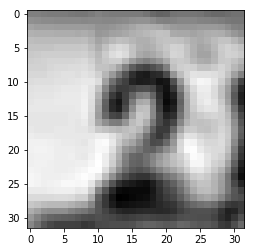

2


In [21]:
print(X_test.shape)
# ii = np.random.randint(0,1999)
ii = 1
t = X_test[ii,:,:,:]
t=t.reshape(32,32)
plt.imshow(t,cmap='gray')
plt.show()
print(y_test[ii])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import h5py

class SVHNDataset():

    def load_dataset(self, path_train, path_test):
        """
        Loads the .mat file from the SVHN Dataset (train and test) indicated at location path. Returns it as numpy array,
        """
        train_dataset = sio.loadmat(path_train)
        test_dataset = sio.loadmat(path_test)

        train_data, train_labels = train_dataset['X'], train_dataset['y']
        test_data, test_labels = test_dataset['X'], test_dataset['y']

        print( 'Train data:', train_data.shape,', Train labels:', train_labels.shape )
        print( 'Test data:', test_data.shape,', Test labels:', test_labels.shape )

        return train_data, train_labels, test_data, test_labels

    def convert_to_gray(self, data):
        """
        Converts all the images in the dataset into gray scale. Returns the dataset with grayscale entries.
        """

        r, g, b = data[:,:,0,:], data[:,:,1,:], data[:,:,2,:]
        gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
        data[:,:,0,:] = gray
        data = data[:,:,0,:]

        return data

svhn = SVHNDataset()
path_train  = '/Users/hkromer/02_PhD/02_Data/12.dcr/Stanford_housenumbers/train_32x32.mat'
path_test  = '/Users/hkromer/02_PhD/02_Data/12.dcr/Stanford_housenumbers/test_32x32.mat'

train_data, train_labels, test_data, test_labels = svhn.load_dataset(path_train, path_test)
# convert to grayscale
train_data = svhn.convert_to_gray(train_data)
test_data = svhn.convert_to_gray(test_data)
print('After conversion to grayscale: ')
print(f'Train data: {train_data.shape}, labels: {train_labels.shape}')
print(f'Test data: {test_data.shape}, labels: {test_labels.shape}')

X_train = np.rollaxis(train_data,2)
X_test = np.rollaxis(test_data,2)

X_train = X_train.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)

print(f'Train data: {X_train.shape}')
print(f'Test data: {X_test.shape}')

y_train = train_labels[:,0]
y_test = test_labels[:,0]

print(f'Train labels: {y_train.shape}')
print(f'Test  labels: {y_test.shape}')


y_train[y_train==10] = 0
y_test[y_test==10] = 0



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


# get a summary of our built model
print(model.summary())


# define the optimizer, loss function and metrics for the network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# start training
history = model.fit(X_train, y_train, epochs=10)
model.save('/Users/hkromer/02_PhD/02_Data/12.dcr/Stanford_housenumbers/2019-19-21.KERAS_model.h5')
# loss, acc = model.evaluate(X_test, y_test)
# print("Model accuracy on test data is: {:6.3f}%".format(100 * acc))



Train data: (32, 32, 3, 73257) , Train labels: (73257, 1)
Test data: (32, 32, 3, 26032) , Test labels: (26032, 1)
After conversion to grayscale: 
Train data: (32, 32, 73257), labels: (73257, 1)
Test data: (32, 32, 26032), labels: (26032, 1)
Train data: (73257, 32, 32, 1)
Test data: (26032, 32, 32, 1)
Train labels: (73257,)
Test  labels: (26032,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
______________________________________